In [2]:
using Plots
using Parameters

In [3]:
function angular_velocity(param, J)
    @unpack j₁, j₂, V, E₀ = param
    ε₁ = J^2/2j₁
    ε₂ = J^2/2j₂ + E₀
    
    ω = 0.5J*((1/j₁ + 1/j₂) - (1/j₁ - 1/j₂)*(ε₁-ε₂)/sqrt((ε₁-ε₂)^2 + 4*V^2))
end

function moment_of_inertia(param, J)
    ω = angular_velocity(param, J)
    j = J/ω
end

moment_of_inertia (generic function with 1 method)

In [11]:
function main(param, Js; save_figure=false)
    f(J) = angular_velocity(param, J)
    ωs = f.(Js)
    
    g(J) = moment_of_inertia(param, J)
    js = g.(Js)
    
    @unpack j₁, j₂, V, E₀ = param
    plot(xlabel="angular velocity", ylabel="moment of inertia", 
        title="j₁=$j₁  j₂=$j₂  V=$V  E₀=$E₀  ")
    plot!(ωs, js)
end

main (generic function with 1 method)

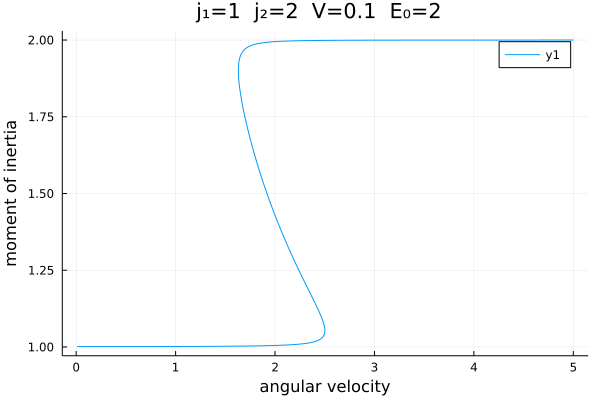

In [14]:
param = (j₁=1, j₂=2, V=0.1, E₀=2)

ΔJ = 0.01
Js = range(ΔJ, 10, step=ΔJ)

main(param, Js; save_figure=true)

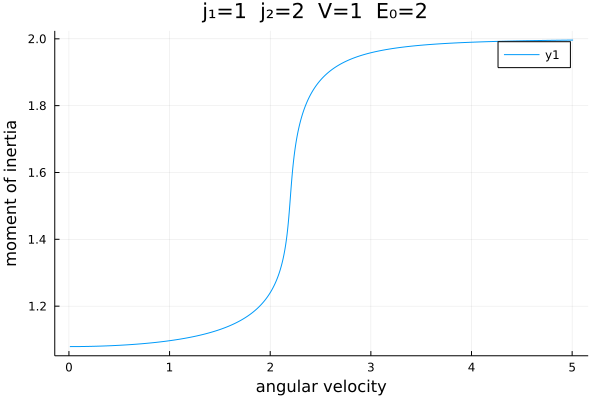

In [15]:
param = (j₁=1, j₂=2, V=1, E₀=2)

ΔJ = 0.01
Js = range(ΔJ, 10, step=ΔJ)

main(param, Js; save_figure=true)